# Graffiti detection using roboflow dataset and YoloV8

This notebook serves as a guide to train and use a the yolov8 model to detect graffiti, in order to do that we will use the ultralytics version of yolov8.

# Before we start working with the model ...

If you had the previous version of the scraper and collected the data with it, you might like to execute the next cells in order to change the names of the images to just the image name instead of the real path.

In [ ]:
import pandas as pd

old_data = pd.read_csv("./links_and_file_names.csv")

old_data.head()

In [2]:
old_data["img_name"][0]

'C:\\Users\\usuario\\Desktop\\Personal projects\\ML-Projects\\graffiti analysis\\graffiti-analysis\\images\\img_0.jpg'

In [10]:
import pathlib
from os import path

newpath = f"{str(pathlib.Path().absolute())}\\"
# pahtlib returns the file location using a c instead of a C
newpath = 'C'+ newpath[1:len(newpath)]
newpath

'C:\\Users\\usuario\\Desktop\\Personal projects\\ML-Projects\\graffiti analysis\\graffiti-analysis\\'

In [11]:
a = old_data["img_name"][0]
a.removeprefix(newpath + "images\\")

'img_0.jpg'

In [12]:
old_data["img_name"] = old_data["img_name"].map(lambda x: x.removeprefix(newpath + "images\\"))

old_data.head()

,link_to_img,img_name
0,https://live.staticflickr.com/3813/11280349214...,img_0.jpg
1,https://live.staticflickr.com/3902/14681887286...,img_1.jpg
2,https://live.staticflickr.com/197/441199812_21...,img_2.jpg
3,https://live.staticflickr.com/65535/5098186973...,img_3.jpg
4,https://live.staticflickr.com/7849/45972882765...,img_4.jpg


In [13]:
old_data.to_csv(str(path.join(newpath, 'links_and_file_names.csv')), index = False)

## Back to training the model

First we use only the data available on the [roboflow dataset](https://universe.roboflow.com/sumanthrao369/graffiti-collab), in order to do that go to the link and then download the zip file for yolov8. After downloading the dataset and unzipping it, now the only thing left to do is to import the yolov8 from the ultralytics library and train it with the yaml file.

In [1]:
import torch

torch.cuda.is_available()

True

Don't execute this cell unless you have an 8GB GPU or better, it would be best if you trained your model on colab and then exported it and use it afterwards.

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

results = model.train(data="data.yaml", epochs=100, imgsz=640, device = 0)

New https://pypi.org/project/ultralytics/8.2.19 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.18  Python-3.11.0 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce 930MX, 2048MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

train: Scanning C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\labels.cache... 896 images, 0 backgrounds, 0 corrupt: 100%|██████████| 896/896 [00:00<?, ?it/s]

train: WARNING  C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\images\01soda2003b_jpg.rf.c2fc92241a77a19726ac22ff58043f40.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\images\0_mast_nyc_2012_jpg.rf.7026432863d0cc350cf06080ddbc2727.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\images\1_yes_nyc_2012_jpg.rf.91793ae1510a17b62247bf6a4b37ccf2.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\images\1zeto_klovn_jpg.rf.73943b007b3343c457538156c5e54a83.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\train\images\photo_0abb4c


val: Scanning C:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\datasets\valid\labels.cache... 257 images, 0 backgrounds, 0 corrupt: 100%|██████████| 257/257 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 754, len(boxes) = 758. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Here the pretrained model is used for inference.

In [1]:
from ultralytics import YOLO
# from pretrained

model = YOLO("best.torchscript", task="detect")

In [2]:
result = model.predict("images/img_2199.jpg")

Loading best.torchscript for TorchScript inference...

image 1/1 c:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\images\img_2199.jpg: 640x640 1 graffiti, 286.8ms
Speed: 212.7ms preprocess, 286.8ms inference, 11853.3ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
result[0].show()

# Graffiti extraction

Now it's time to crop de graffiti from the picture and take its color palette

In [4]:
import cv2

# Perform inference on an image
results = model("images/img_2199.jpg")

# Load the original image
image = "images/img_2199.jpg"
img = cv2.imread(image)

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Save the cropped object as an image
    cv2.imwrite('ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)


image 1/1 c:\Users\usuario\Desktop\Personal projects\ML-Projects\graffiti analysis\graffiti-analysis\images\img_2199.jpg: 640x640 1 graffiti, 209.1ms
Speed: 16.0ms preprocess, 209.1ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


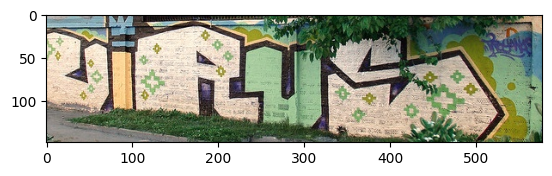

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

crop = cv2.imread('ultralytics_crop_0.jpg')
plt.imshow(crop)
plt.show()

Ahora extraemos la paleta de colores:

In [11]:
from colorthief import ColorThief

color_thief = ColorThief('ultralytics_crop_0.jpg')
palette = color_thief.get_palette(color_count= 6, quality = 1)

for i in range(0, 6):
    print(f"the color number {i} of the palette is ",palette[i])

the color number 0 of the palette is  (53, 72, 61)
the color number 1 of the palette is  (210, 227, 238)
the color number 2 of the palette is  (170, 204, 209)
the color number 3 of the palette is  (153, 177, 199)
the color number 4 of the palette is  (144, 159, 140)
the color number 5 of the palette is  (101, 154, 134)
